<a href="https://colab.research.google.com/github/sanlakshya/Python-Workbooks/blob/main/Pandas_DATA_Viz_Gaming_Companyipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DATA VISULISATION ft. PANDAS**

In [1]:
!gdown 1iNdDtAsOjEezHQNwS2hzuGk-CZ8cvd3p

Downloading...
From: https://drive.google.com/uc?id=1iNdDtAsOjEezHQNwS2hzuGk-CZ8cvd3p
To: /content/final_vg.csv
100% 2.04M/2.04M [00:00<00:00, 62.7MB/s]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('final_vg.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


In [3]:
#Univariate Data visualization - Categorial

In [4]:
#Viz. Genre counts through BAR plot

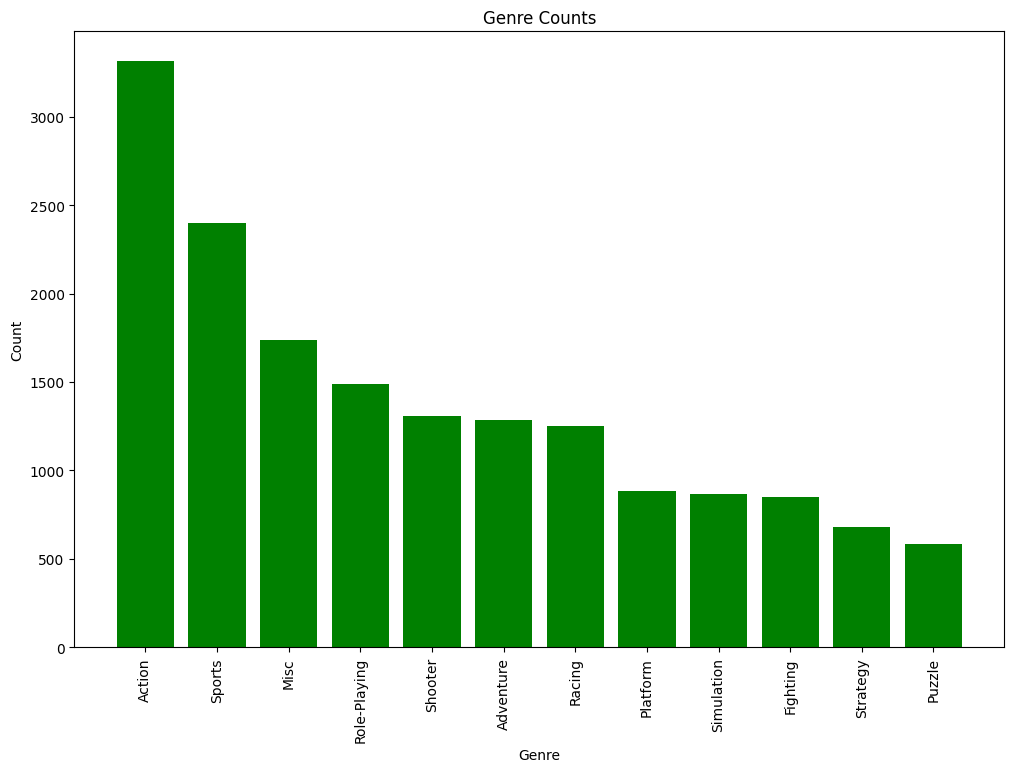

In [5]:
cat_counts=data['Genre'].value_counts()
x_bar=cat_counts.index
y_bar=cat_counts.values
plt.figure(figsize=(12,8))
plt.bar(x_bar,y_bar,color='green')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Counts')
plt.show()

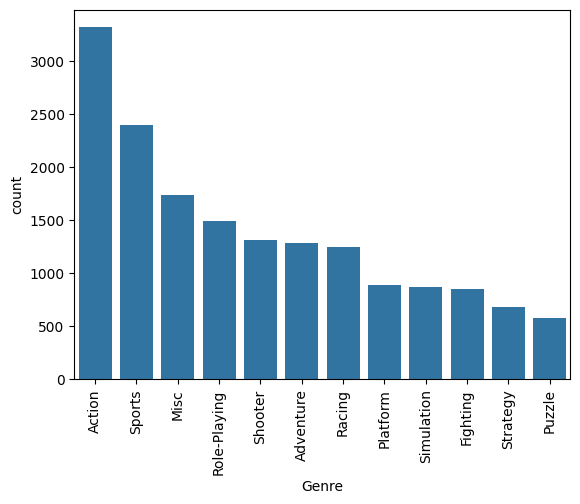

In [6]:
sns.countplot(x='Genre', data=data, order=data['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


In [7]:
#Univariate Data Visualization - Numerical Data

In [8]:
#How can we understand the popularity of video games year by year?

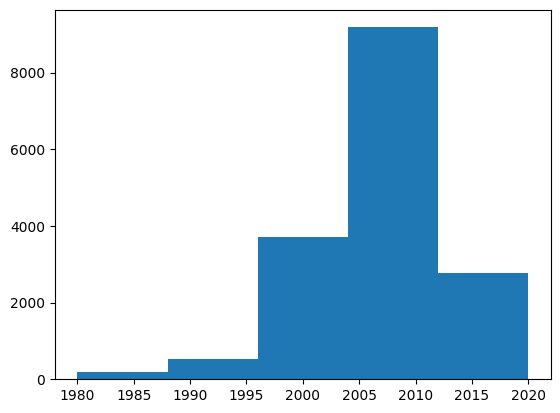

In [9]:
plt.hist(data['Year'], bins=5)
plt.show()

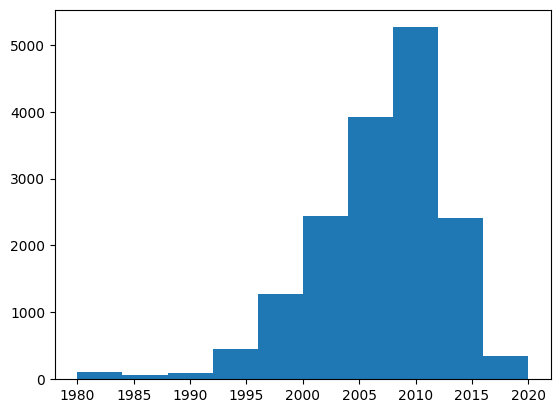

In [10]:
count, bins, _ = plt.hist(data['Year'])


In [11]:
count

array([ 112.,   70.,   92.,  449., 1274., 2440., 3921., 5262., 2406.,
        355.])

In [12]:
bins

array([1980., 1984., 1988., 1992., 1996., 2000., 2004., 2008., 2012.,
       2016., 2020.])

<Axes: xlabel='Year', ylabel='Count'>

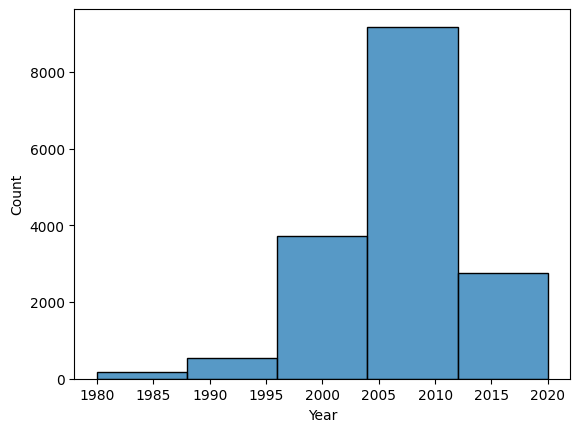

In [13]:
sns.histplot(data['Year'], bins=5)

<Axes: ylabel='Global_Sales'>

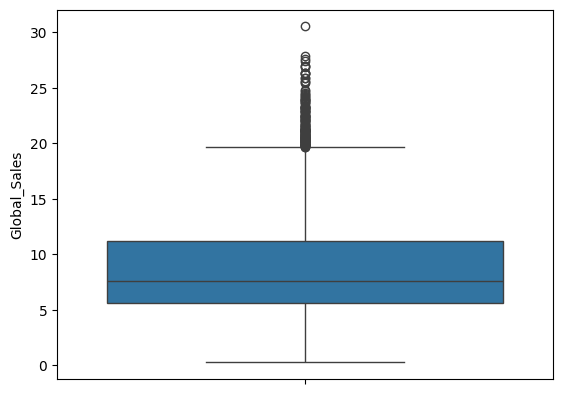

In [14]:
sns.boxplot(y=data['Global_Sales'])


In [15]:
top3_gen = data['Genre'].value_counts().index[:3]
top3_pub = data['Publisher'].value_counts().index[:3]
top3_plt = data['Platform'].value_counts().index[:3]
top3_data = data.loc[(data['Genre'].isin(top3_gen)) &
(data['Publisher'].isin(top3_pub)) &
(data['Platform'].isin(top3_plt))]

<Axes: xlabel='Publisher', ylabel='Global_Sales'>

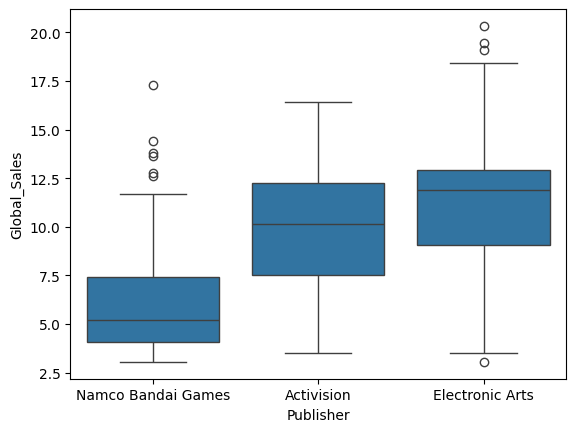

In [16]:
sns.boxplot(x='Publisher', y='Global_Sales', data=top3_data)


In [17]:
#SUB Plots

<Axes: xlabel='EU_Sales', ylabel='JP_Sales'>

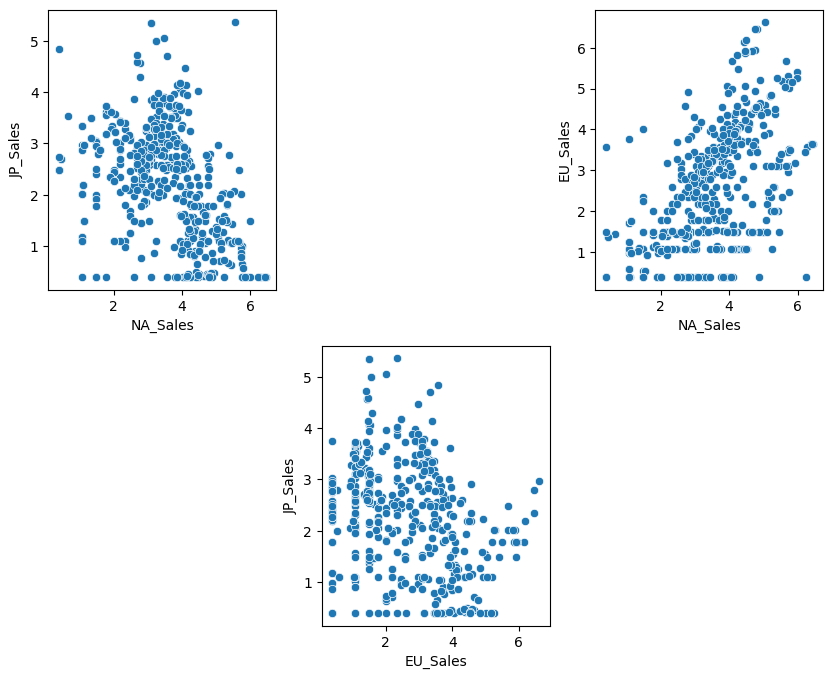

In [18]:
fig = plt.figure(figsize=(10, 8))
plt.subplot(2, 3, 1)
sns.scatterplot(x='NA_Sales', y='JP_Sales', data=top3_data)
plt.subplot(2, 3, 3)
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=top3_data)
plt.subplot(2, 3, 5)
sns.scatterplot(x='EU_Sales', y='JP_Sales', data=top3_data)

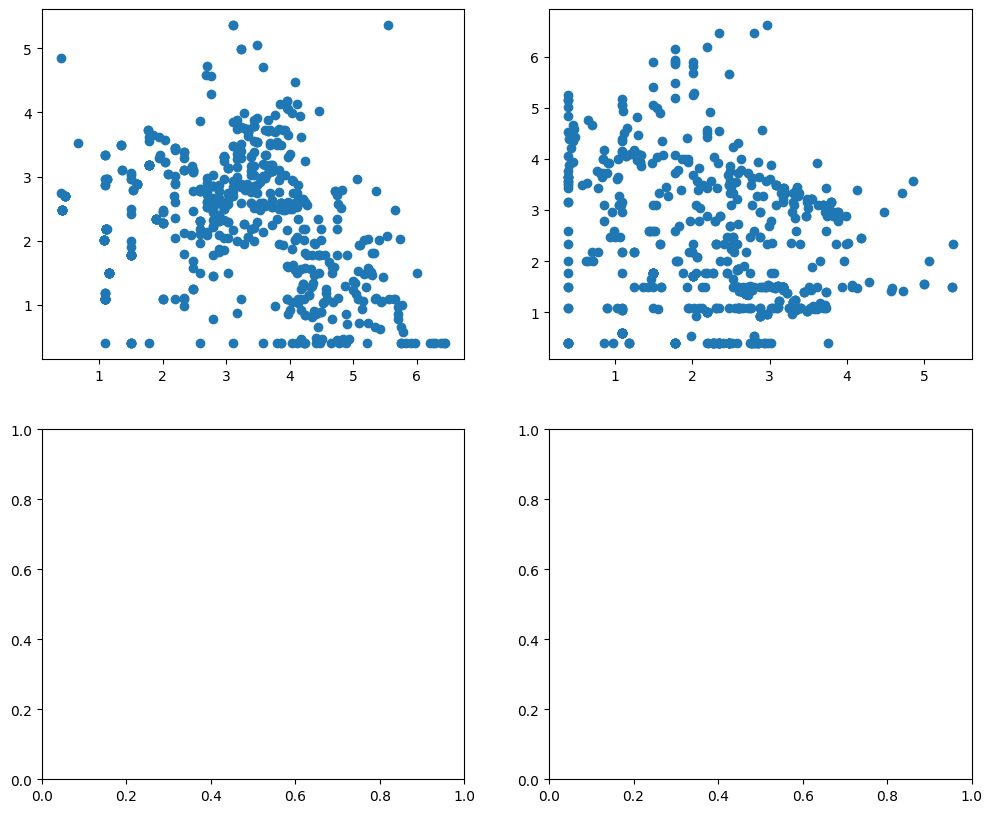

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0][0].scatter(top3_data['NA_Sales'], top3_data['JP_Sales'])
ax[0][1].scatter(top3_data['JP_Sales'], top3_data['EU_Sales'])


<Axes: xlabel='Publisher', ylabel='count'>

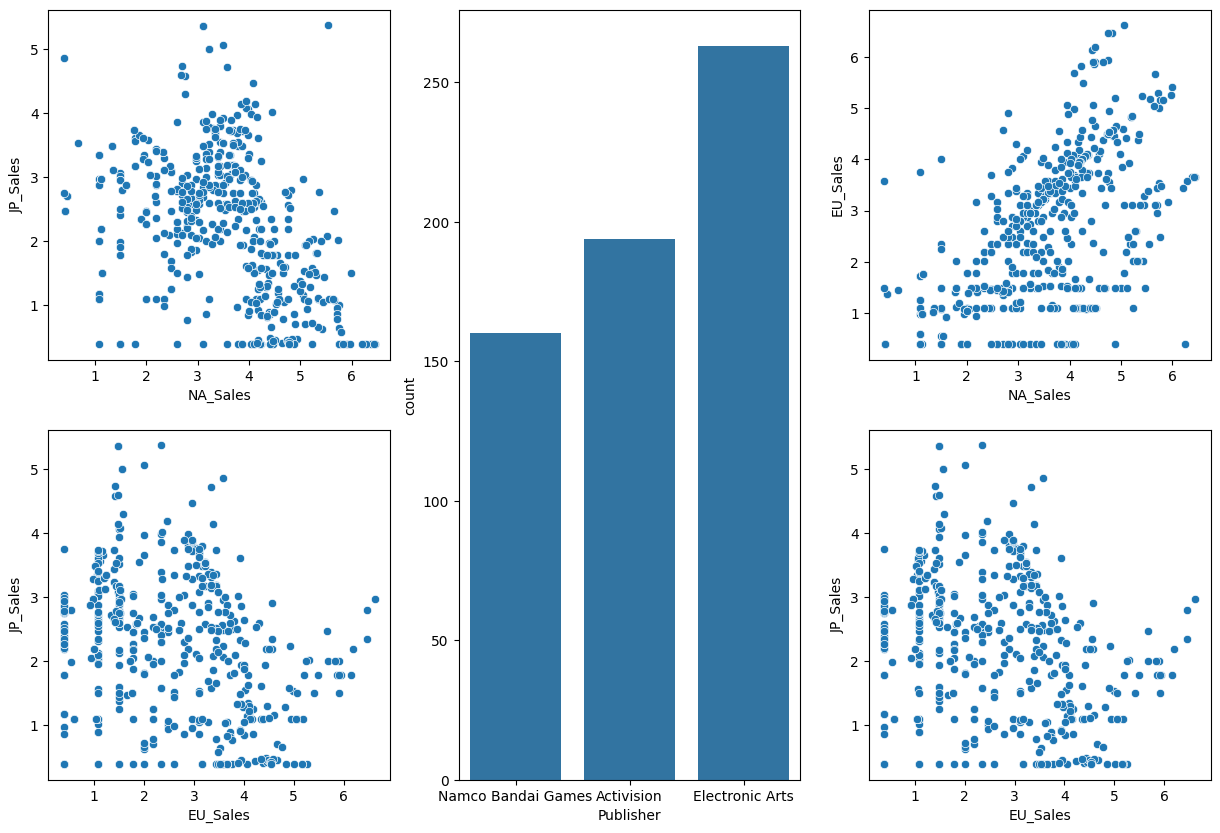

In [20]:
fig = plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.scatterplot(x='NA_Sales', y='JP_Sales', data=top3_data)
plt.subplot(2, 3, 3)
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=top3_data)
plt.subplot(2, 3, 4)
sns.scatterplot(x='EU_Sales', y='JP_Sales', data=top3_data)
plt.subplot(2, 3, 6)
sns.scatterplot(x='EU_Sales', y='JP_Sales', data=top3_data)
plt.subplot(1, 3, 2)
sns.countplot(x='Publisher', data=top3_data)

<Axes: xlabel='Publisher', ylabel='Global_Sales'>

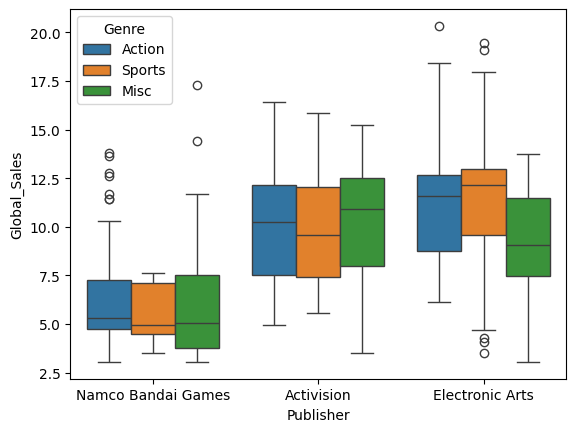

In [21]:
sns.boxplot(x='Publisher', y='Global_Sales', data=top3_data, hue='Genre')

<Axes: xlabel='NA_Sales', ylabel='JP_Sales'>

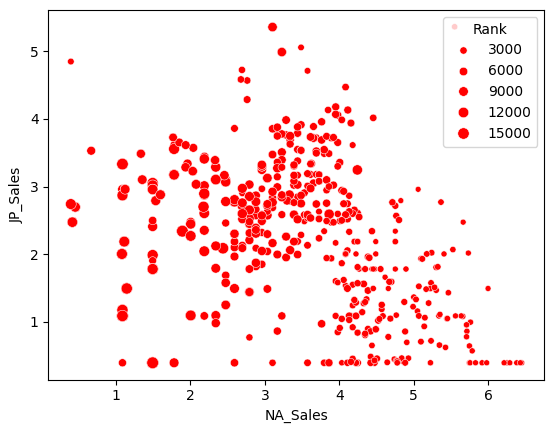

In [22]:
sns.scatterplot(x='NA_Sales', y='JP_Sales', data=top3_data, size='Rank', color='red')

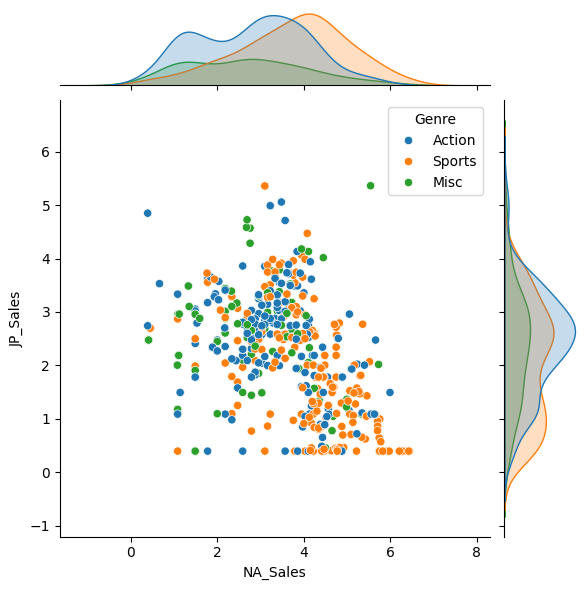

In [23]:
sns.jointplot(x='NA_Sales', y='JP_Sales', data=top3_data, hue='Genre')

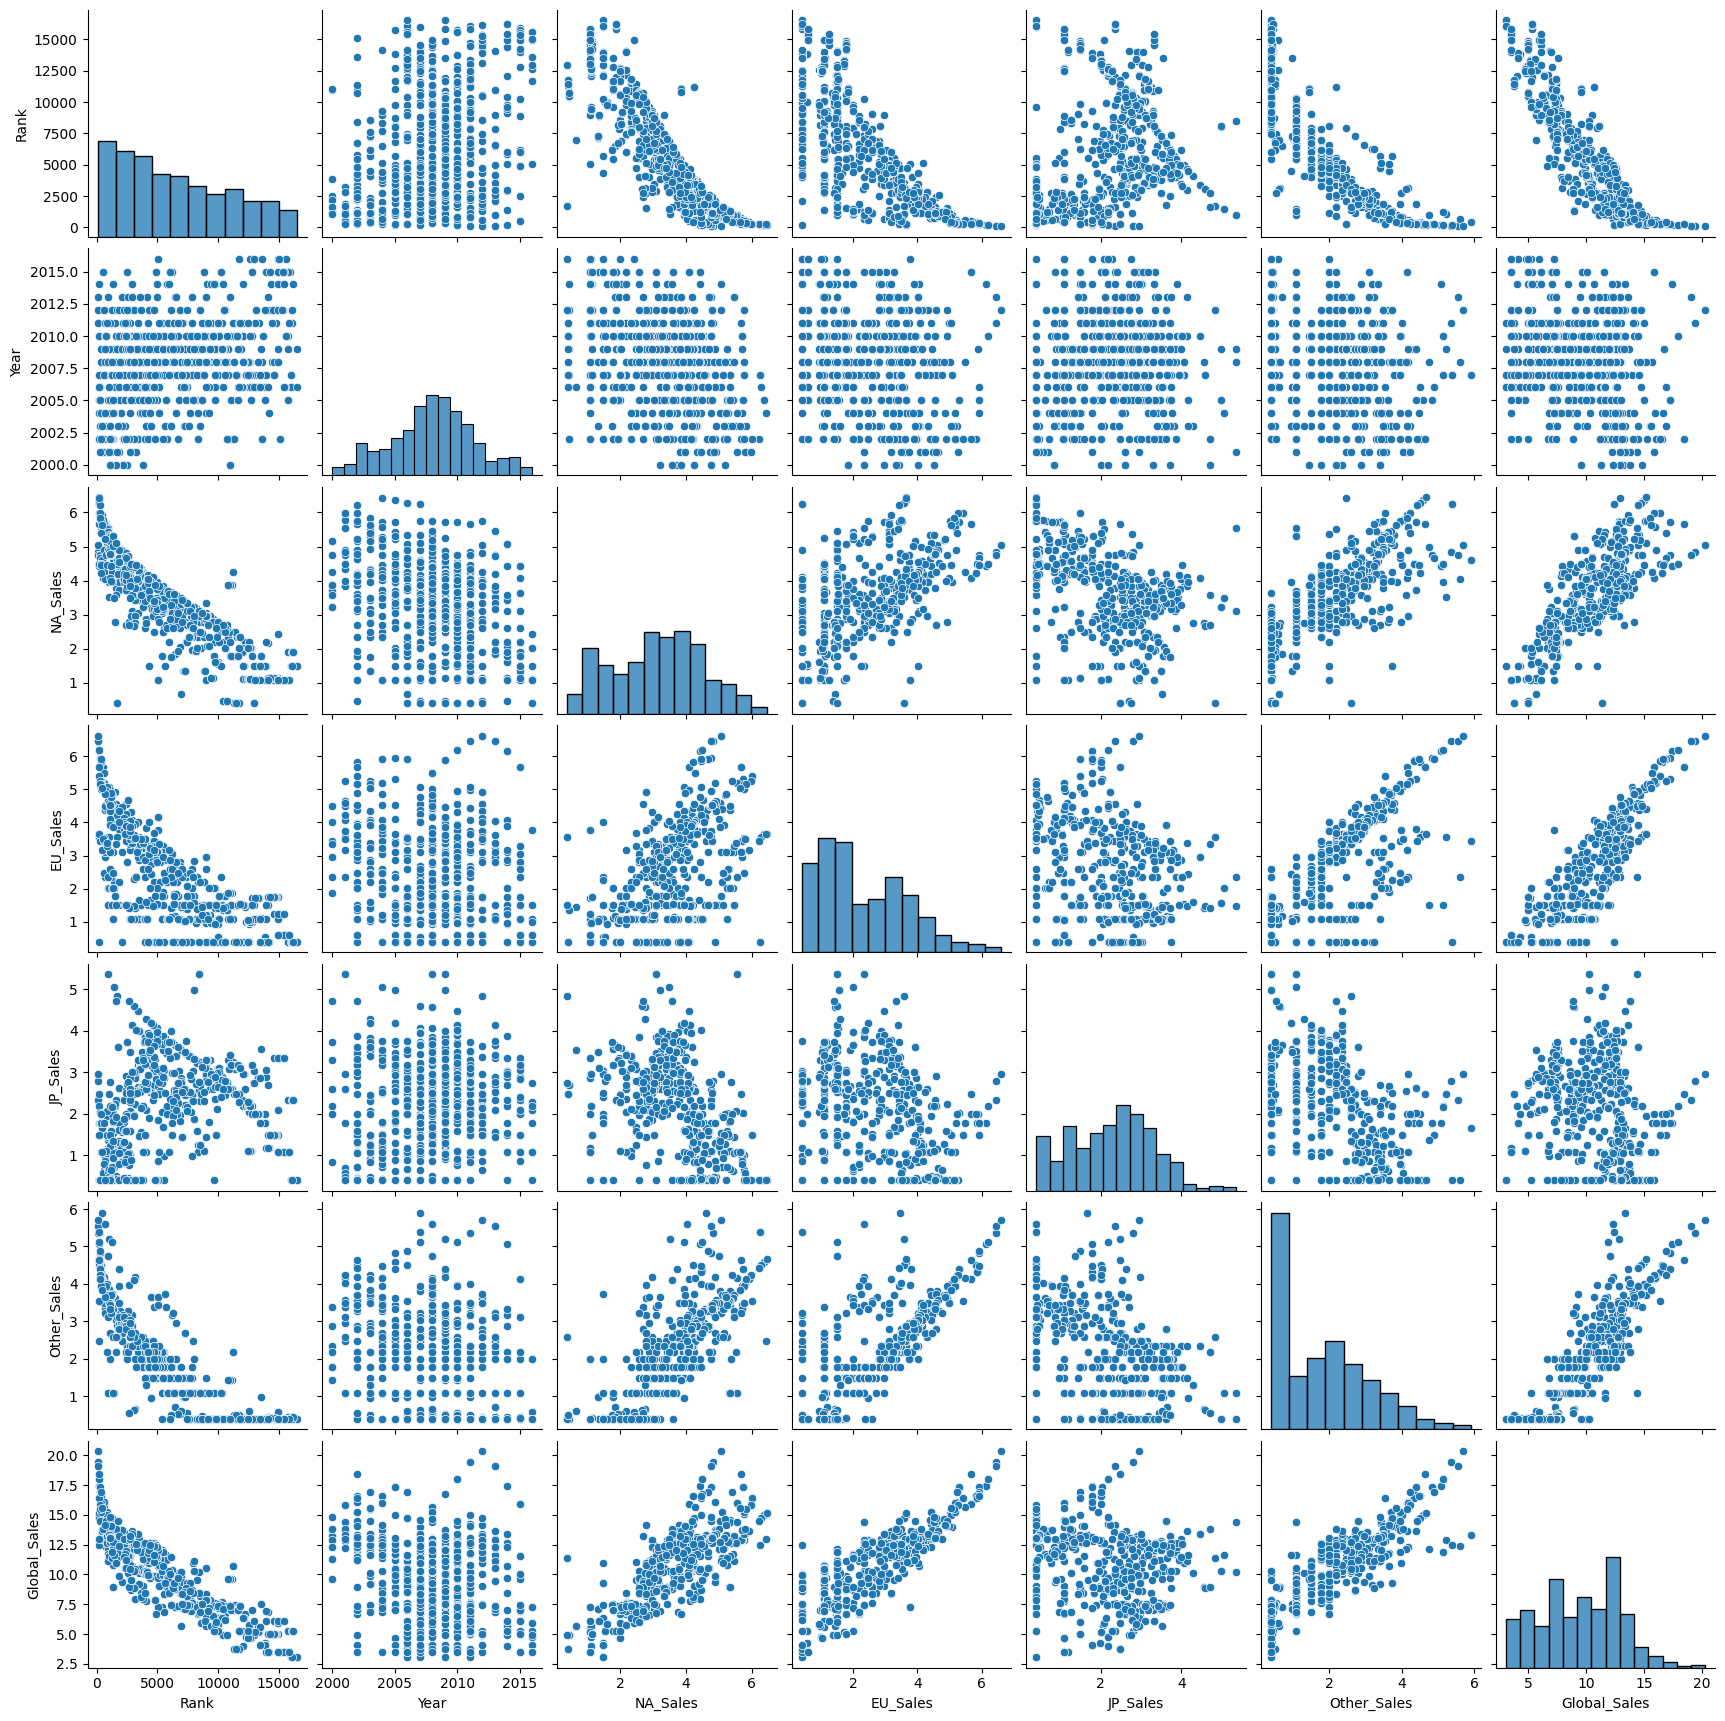

In [24]:
sns.pairplot(data=top3_data)


In [27]:
# Select only numerical columns before calculating the correlation
numerical_data = top3_data.select_dtypes(include=['number'])
numerical_data.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.328705,-0.873726,-0.735711,0.115459,-0.857567,-0.911721
Year,0.328705,1.000000,-0.354256,-0.178026,0.055864,-0.239876,-0.280351
NA_Sales,-0.873726,-0.354256,1.000000,0.617483,-0.233315,0.794353,0.856300
EU_Sales,-0.735711,-0.178026,0.617483,1.000000,-0.208249,0.771105,0.864147
JP_Sales,0.115459,0.055864,-0.233315,-0.208249,1.000000,-0.355825,-0.014193
Other_Sales,-0.857567,-0.239876,0.794353,0.771105,-0.355825,1.000000,0.878816
Global_Sales,-0.911721,-0.280351,0.856300,0.864147,-0.014193,0.878816,1.000000


<Axes: >

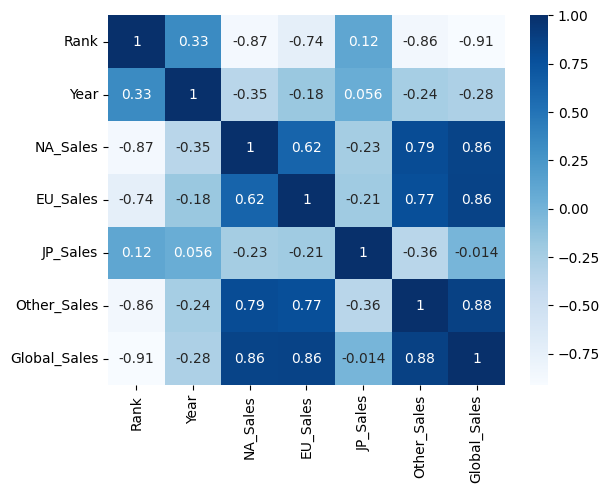

In [29]:
 sns.heatmap(numerical_data.corr(), cmap='Blues', annot=True)

In [ ]:
#This covers the univariate,Bivariate and Multivariate Data visulisation in Python